**EDA**

In [5]:
import pandas as pd

train_data = pd.read_parquet('train.parquet')
test_data = pd.read_parquet('test.parquet')

print("Train Data Sample:")
print(train_data.head())

print("\nTest Data Sample:")
print(test_data.head())

print("\nTrain Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nTrain Data Types:\n", train_data.dtypes)

Train Data Sample:
      id                                              dates  \
0  19114  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  22769  [2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...   
2  76935  [2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...   
3  66297  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
4   2191  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   

                                              values  label  
0  [-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....    0.0  
1  [-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...    1.0  
2  [0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...    0.0  
3  [-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...    0.0  
4  [1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...    0.0  

Test Data Sample:
      id                                              dates  \
0   6125  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  26781  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
2  13333  [2016-06-01,

In [3]:
train_data

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0
...,...,...,...,...
79995,71474,"[2018-10-01, 2018-11-01, 2018-12-01, 2019-01-0...","[-0.15, -1.13, -0.87, 0.49, 0.87, 1.67, 1.91, ...",0.0
79996,36908,"[2016-07-01, 2016-08-01, 2016-09-01, 2016-10-0...","[-0.35, -1.31, 0.11, 1.46, 1.28, 1.12, 1.78, 1...",1.0
79997,63517,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[-0.78, -2.27, -1.85, -0.67, -1.2, -2.02, 0.12...",0.0
79998,94731,"[2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...","[-2.29, -2.85, 0.92, -0.83, -1.75, -1.81, -2.2...",0.0


In [5]:
print("\nTrain Data Description:")
print(train_data.describe())


Train Data Description:
                 id         label
count  80000.000000  80000.000000
mean   50107.893162      0.277250
std    28857.649778      0.447644
min        0.000000      0.000000
25%    25122.500000      0.000000
50%    50146.500000      0.000000
75%    75064.250000      1.000000
max    99999.000000      1.000000


In [6]:
print("\nClass Distribution in Train Data:")
print(train_data['label'].value_counts(normalize=True))


Class Distribution in Train Data:
label
0.0    0.72275
1.0    0.27725
Name: proportion, dtype: float64


Отформатируем данные в удобный формат

Данные имеют сложную структуру, в которой "dates" и "values" являются списками (или массивами). Для работы с временными рядами и генерации признаков на их основе необходимо привести данные в формат, удобный для дальнейшего анализа.

In [6]:
import pandas as pd

expanded_data = train_data.apply(lambda row: pd.DataFrame({
    'id': row['id'],
    'dates': row['dates'],
    'values': row['values'],
    'label': row['label']
}), axis=1)

expanded_data = pd.concat(expanded_data.values)

expanded_data['dates'] = pd.to_datetime(expanded_data['dates'], errors='coerce')

print("Expanded Data:")
print(expanded_data.head())

Expanded Data:
      id      dates  values  label
0  19114 2016-01-01   -1.86    0.0
1  19114 2016-02-01    0.79    0.0
2  19114 2016-03-01    1.40    0.0
3  19114 2016-04-01    0.15    0.0
4  19114 2016-05-01    0.00    0.0


Визуализируем данные

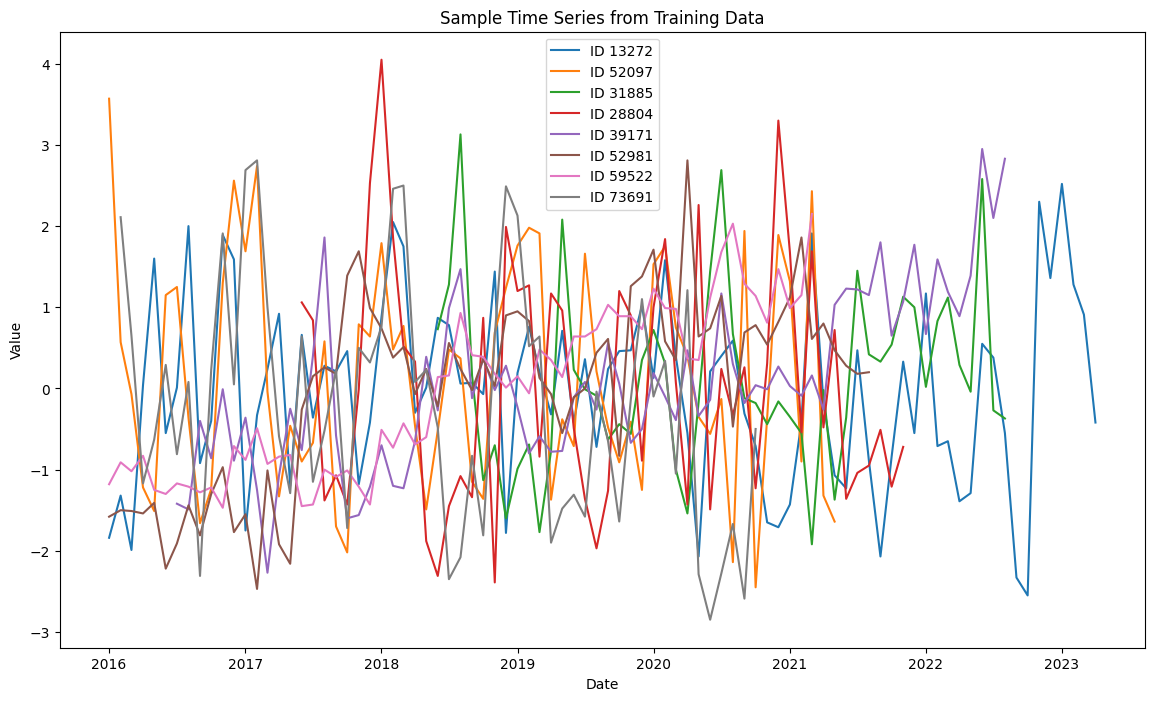

In [10]:
import matplotlib.pyplot as plt
import random

# Выберем несколько случайных временных рядов для визуализации
sample_ids = random.sample(list(expanded_data['id'].unique()), 8)

plt.figure(figsize=(14, 8))

for obj_id in sample_ids:
    subset = expanded_data[expanded_data['id'] == obj_id]
    plt.plot(subset['dates'], subset['values'], label=f'ID {obj_id}')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sample Time Series from Training Data')
plt.legend()
plt.show()

**Возможные проблемы и сложности**


1. Высокий уровень шума: Данные выглядят случайными, с большим количеством колебаний. Это может затруднить выделение четких шаблонов.

2. Отсутствие явных трендов и сезонности: На графике не наблюдается четких трендов или циклов, которые можно было бы использовать для различения классов.

3. Краткосрочные изменения: Если различия между классами выражены лишь в краткосрочных изменениях, это также усложняет классификацию, так как сложно выделить долговременные паттерны.

**HistGradientBoostingClassifier**

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [7]:
train_data = expanded_data

In [14]:
import pandas as pd
import numpy as np

def extract_features(group):
    features = {
        'mean': group['values'].mean(),
        'std': group['values'].std(),
        'min': group['values'].min(),
        'max': group['values'].max(),
        'median': group['values'].median(),
        'first': group['values'].iloc[0],
        'last': group['values'].iloc[-1],
        'trend': (group['values'].iloc[-1] - group['values'].iloc[0]) / len(group)
    }
    return pd.Series(features)

features_data = expanded_data.groupby('id').apply(extract_features).reset_index()

# Добавим метки классов
features_data = features_data.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')
print("Extracted Features:")
print(features_data.head())

c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\A

Extracted Features:
   id      mean       std       min   max    median  first      last  \
0   0 -0.024030  1.040184 -1.630000  5.57 -0.160000   1.74 -0.480000   
1   1  0.026327  1.098212 -3.240000  2.96 -0.040000   2.96  0.610000   
2   3  0.165600  1.312044 -3.080000  3.08  0.030000  -0.28 -1.540000   
3   4  0.011750  1.074425 -1.950000  2.24  0.035000   0.64 -1.170000   
4   5 -0.252125  1.111204 -2.030649  3.50 -0.355325   1.30 -0.580649   

      trend  label  
0 -0.033134    0.0  
1 -0.047959    0.0  
2 -0.016800    0.0  
3 -0.045250    0.0  
4 -0.052240    1.0  


D:\temp\ipykernel_12468\2933901795.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_data = expanded_data.groupby('id').apply(extract_features).reset_index()


In [16]:
from sklearn.model_selection import train_test_split

X = features_data.drop(columns=['id', 'label'])
y = features_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score

model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC:", roc_auc)

Test ROC AUC: 0.8555489961948317


Добавим разделение на валидационную выборку

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

# Заполнение пропусков (используем среднее значение признака)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Балансировка классов с использованием SMOTE на обучающих данных
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Инициализация и обучение классификатора HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
model.fit(X_train_balanced, y_train_balanced)

# Предсказание вероятностей на валидационной выборке
y_val_proba = model.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_val_proba)
print("Validation ROC AUC:", roc_auc_val)

# Предсказание вероятностей на тестовой выборке
y_test_proba = model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)


Validation ROC AUC: 0.8595719948088765
Test ROC AUC: 0.8603634587916242


Добавим TimeSeriesSplit для кросс-валидации

In [34]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]
    

    model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
    model.fit(X_train_split, y_train_split)
    

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue
    

    y_val_proba = model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")


if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")


model.fit(X_train_balanced, y_train_balanced)
y_test_proba = model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)


ROC AUC на валидационном наборе (итерация 1): 0.8902598313648145
ROC AUC на валидационном наборе (итерация 2): 0.8914387927092551
ROC AUC на валидационном наборе (итерация 3): 0.8917868988849762
ROC AUC на валидационном наборе (итерация 4): 0.9094155825345972
Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.8957252763734107
Test ROC AUC: 0.8998639877554863


Добавим Fast Fourier Transform (FFT)

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE


def apply_filters(group):
 
    group['values_ma'] = group['values'].rolling(window=5, min_periods=1).mean()
    group['values_median'] = group['values'].rolling(window=5, min_periods=1).median()
    return group


expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)

# Извлечение признаков на основе сглаженных данных и добавление новых признаков
def extract_features(group):
    # Частотные характеристики с помощью FFT
    fft_values = np.fft.fft(group['values'].values)
    fft_magnitude = np.abs(fft_values)[:5] 

    features = {
        'mean_ma': group['values_ma'].mean(),
        'std_ma': group['values_ma'].std(),
        'min_ma': group['values_ma'].min(),
        'max_ma': group['values_ma'].max(),
        'median_ma': group['values_ma'].median(),
        'first_ma': group['values_ma'].iloc[0],
        'last_ma': group['values_ma'].iloc[-1],
        'trend_ma': (group['values_ma'].iloc[-1] - group['values_ma'].iloc[0]) / len(group),

        'mean_median': group['values_median'].mean(),
        'std_median': group['values_median'].std(),
        'min_median': group['values_median'].min(),
        'max_median': group['values_median'].max(),
        'median_median': group['values_median'].median(),
        'first_median': group['values_median'].iloc[0],
        'last_median': group['values_median'].iloc[-1],
        'trend_median': (group['values_median'].iloc[-1] - group['values_median'].iloc[0]) / len(group),


        'lag_1': group['values'].shift(1).iloc[-1],
        'lag_2': group['values'].shift(2).iloc[-1],
        'lag_3': group['values'].shift(3).iloc[-1],


        'fft_1': fft_magnitude[0],
        'fft_2': fft_magnitude[1],
        'fft_3': fft_magnitude[2],
        'fft_4': fft_magnitude[3],
        'fft_5': fft_magnitude[4]
    }
    return pd.Series(features)

expanded_data_filtered = expanded_data_filtered.reset_index(drop=True)
features_data_filtered = expanded_data_filtered.groupby('id').apply(extract_features).reset_index()
features_data_filtered = features_data_filtered.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')


X = features_data_filtered.drop(columns=['id', 'label'])
y = features_data_filtered['label']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]
    
    model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
    model.fit(X_train_split, y_train_split)
    
    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue
    

    y_val_proba = model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")

if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

model.fit(X_train_balanced, y_train_balanced)
y_test_proba = model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

D:\temp\ipykernel_12468\1888899390.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  retu

ROC AUC на валидационном наборе (итерация 1): 0.8936915289848466
ROC AUC на валидационном наборе (итерация 2): 0.895903635511621
ROC AUC на валидационном наборе (итерация 3): 0.8975206613854598
ROC AUC на валидационном наборе (итерация 4): 0.912816194266756
Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.8999830050371709
Test ROC AUC: 0.9009854706311715


Добавим статистические признаки: Квартиль, дисперсия и автокорреляция.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


def apply_filters(group):
    group['values_ma'] = group['values'].rolling(window=5, min_periods=1).mean()
    group['values_median'] = group['values'].rolling(window=5, min_periods=1).median()
    return group


expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)

def extract_features(group):
    fft_values = np.fft.fft(group['values'].values)
    fft_magnitude = np.abs(fft_values)[:5] 

    features = {
        'mean_ma': group['values_ma'].mean(),
        'std_ma': group['values_ma'].std(),
        'min_ma': group['values_ma'].min(),
        'max_ma': group['values_ma'].max(),
        'median_ma': group['values_ma'].median(),
        'first_ma': group['values_ma'].iloc[0],
        'last_ma': group['values_ma'].iloc[-1],
        'trend_ma': (group['values_ma'].iloc[-1] - group['values_ma'].iloc[0]) / len(group),

        'mean_median': group['values_median'].mean(),
        'std_median': group['values_median'].std(),
        'min_median': group['values_median'].min(),
        'max_median': group['values_median'].max(),
        'median_median': group['values_median'].median(),
        'first_median': group['values_median'].iloc[0],
        'last_median': group['values_median'].iloc[-1],
        'trend_median': (group['values_median'].iloc[-1] - group['values_median'].iloc[0]) / len(group),

        'lag_1': group['values'].shift(1).iloc[-1],
        'lag_2': group['values'].shift(2).iloc[-1],
        'lag_3': group['values'].shift(3).iloc[-1],


        'fft_1': fft_magnitude[0],
        'fft_2': fft_magnitude[1],
        'fft_3': fft_magnitude[2],
        'fft_4': fft_magnitude[3],
        'fft_5': fft_magnitude[4],


        '25_percentile': np.percentile(group['values'], 25),
        '75_percentile': np.percentile(group['values'], 75),

        'variance': group['values'].var(),

        'autocorr_lag_1': group['values'].autocorr(lag=1)
    }
    return pd.Series(features)

expanded_data_filtered = expanded_data_filtered.reset_index(drop=True)

features_data_filtered = expanded_data_filtered.groupby('id').apply(extract_features).reset_index()

features_data_filtered = features_data_filtered.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')

X = features_data_filtered.drop(columns=['id', 'label'])
y = features_data_filtered['label']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]

    model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
    model.fit(X_train_split, y_train_split)

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue

    y_val_proba = model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")

if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

model.fit(X_train_balanced, y_train_balanced)
y_test_proba = model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

D:\temp\ipykernel_12468\1259601325.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


ROC AUC на валидационном наборе (итерация 1): 0.9020041087680873
ROC AUC на валидационном наборе (итерация 2): 0.905425408352575
ROC AUC на валидационном наборе (итерация 3): 0.9069271475402586
ROC AUC на валидационном наборе (итерация 4): 0.9187856451782436
Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.9082855774597911
Test ROC AUC: 0.9097431911136462


Используем xgboost

In [37]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 6],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])]
}

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]

    smote = SMOTE(random_state=42)
    X_train_split_balanced, y_train_split_balanced = smote.fit_resample(X_train_split, y_train_split)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    random_search = RandomizedSearchCV(
        xgb,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        n_jobs=-1,
        cv=3,
        random_state=42,
        verbose=1
    )

    random_search.fit(X_train_split_balanced, y_train_split_balanced)

    best_model = random_search.best_estimator_

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue

    y_val_proba = best_model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")

if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

best_model.fit(X_train_balanced, y_train_balanced)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 1): 0.8868448940047037
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 2): 0.8883524916313682
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 3): 0.8919656371446104
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 4): 0.9309754029820769
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:52:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.8995346064406897
Test ROC AUC: 0.8987873838909463


Добавим Fast Fourier Transform (FFT)

In [39]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, None],
    'max_iter': [100, 150, 200],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0.0, 1.0, 5.0]
}

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]

    smote = SMOTE(random_state=42)
    X_train_split_balanced, y_train_split_balanced = smote.fit_resample(X_train_split, y_train_split)

    model = HistGradientBoostingClassifier()

    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        n_jobs=-1,
        cv=3,
        random_state=42,
        verbose=1
    )

    random_search.fit(X_train_split_balanced, y_train_split_balanced)

    best_model = random_search.best_estimator_

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue

    y_val_proba = best_model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")
    
if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

best_model.fit(X_train_balanced, y_train_balanced)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 1): 0.8876682796146362
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 2): 0.8931469883833968
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 3): 0.8950946415836987
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 4): 0.939332689433785
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.9038106497538791
Test ROC AUC: 0.9019620639407028


Добавим статистические признаки: Квартиль, дисперсия и автокорреляция.

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE


def apply_filters(group):
    group['values_ma'] = group['values'].rolling(window=5, min_periods=1).mean()
    group['values_median'] = group['values'].rolling(window=5, min_periods=1).median()
    return group

expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)

def extract_features(group):
    features = {
        'mean': group['values'].mean(),
        'std': group['values'].std(),
        'min': group['values'].min(),
        'max': group['values'].max(),
        'median': group['values'].median(),
        'first': group['values'].iloc[0],
        'last': group['values'].iloc[-1],
        'trend': (group['values'].iloc[-1] - group['values'].iloc[0]) / len(group),

        '25_percentile': np.percentile(group['values'], 25),
        '75_percentile': np.percentile(group['values'], 75),

        'variance': group['values'].var(),

        'lag_1': group['values'].shift(1).iloc[-1],
        'lag_2': group['values'].shift(2).iloc[-1],
        'lag_3': group['values'].shift(3).iloc[-1],

        'autocorr_lag_1': group['values'].autocorr(lag=1)
    }
    return pd.Series(features)

expanded_data_filtered = expanded_data_filtered.reset_index(drop=True)

features_data_filtered = expanded_data_filtered.groupby('id').apply(extract_features).reset_index()

features_data_filtered = features_data_filtered.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')

X = features_data_filtered.drop(columns=['id', 'label'])
y = features_data_filtered['label']

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, None],
    'max_iter': [100, 150, 200],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0.0, 1.0, 5.0]
}

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]

    smote = SMOTE(random_state=42)
    X_train_split_balanced, y_train_split_balanced = smote.fit_resample(X_train_split, y_train_split)

    model = HistGradientBoostingClassifier()

    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        n_jobs=-1,
        cv=3, 
        random_state=42,
        verbose=1
    )

    random_search.fit(X_train_split_balanced, y_train_split_balanced)

    best_model = random_search.best_estimator_

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue


    y_val_proba = best_model.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")

if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

best_model.fit(X_train_balanced, y_train_balanced)
y_test_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

D:\temp\ipykernel_12468\2155782724.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 1): 0.8961363114966687
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 2): 0.8960749732099069
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 3): 0.8989239356967931
Fitting 3 folds for each of 20 candidates, totalling 60 fits
ROC AUC на валидационном наборе (итерация 4): 0.9356883393764437
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.906705889944953
Test ROC AUC: 0.9049711735006742


Объединим модели в Voting Classifier Ensemble

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

def apply_filters(group):
    group['values_ma'] = group['values'].rolling(window=5, min_periods=1).mean()

    group['values_median'] = group['values'].rolling(window=5, min_periods=1).median()
    return group

expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)

def extract_features(group):
    fft_values = np.fft.fft(group['values'].values)
    fft_magnitude = np.abs(fft_values)[:5] 

    features = {
        'mean_ma': group['values_ma'].mean(),
        'std_ma': group['values_ma'].std(),
        'min_ma': group['values_ma'].min(),
        'max_ma': group['values_ma'].max(),
        'median_ma': group['values_ma'].median(),
        'first_ma': group['values_ma'].iloc[0],
        'last_ma': group['values_ma'].iloc[-1],
        'trend_ma': (group['values_ma'].iloc[-1] - group['values_ma'].iloc[0]) / len(group),

        'mean_median': group['values_median'].mean(),
        'std_median': group['values_median'].std(),
        'min_median': group['values_median'].min(),
        'max_median': group['values_median'].max(),
        'median_median': group['values_median'].median(),
        'first_median': group['values_median'].iloc[0],
        'last_median': group['values_median'].iloc[-1],
        'trend_median': (group['values_median'].iloc[-1] - group['values_median'].iloc[0]) / len(group),

        'lag_1': group['values'].shift(1).iloc[-1],
        'lag_2': group['values'].shift(2).iloc[-1],
        'lag_3': group['values'].shift(3).iloc[-1],

        'fft_1': fft_magnitude[0],
        'fft_2': fft_magnitude[1],
        'fft_3': fft_magnitude[2],
        'fft_4': fft_magnitude[3],
        'fft_5': fft_magnitude[4],

        '25_percentile': np.percentile(group['values'], 25),
        '75_percentile': np.percentile(group['values'], 75),
        'variance': group['values'].var(),
        'autocorr_lag_1': group['values'].autocorr(lag=1)
    }
    return pd.Series(features)

expanded_data_filtered = expanded_data_filtered.reset_index(drop=True)

features_data_filtered = expanded_data_filtered.groupby('id').apply(extract_features).reset_index()

features_data_filtered = features_data_filtered.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')

X = features_data_filtered.drop(columns=['id', 'label'])
y = features_data_filtered['label']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

tscv = TimeSeriesSplit(n_splits=5)
roc_auc_scores = []

hist_model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1]))

voting_clf = VotingClassifier(estimators=[
    ('hist', hist_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

for train_index, val_index in tscv.split(X_train_balanced):
    X_train_split, X_val_split = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_split, y_val_split = y_train_balanced[train_index], y_train_balanced[val_index]

    voting_clf.fit(X_train_split, y_train_split)

    if len(np.unique(y_val_split)) < 2:
        print(f"Пропуск итерации {len(roc_auc_scores) + 1} из-за одного класса в y_val_split")
        continue

    y_val_proba = voting_clf.predict_proba(X_val_split)[:, 1]
    roc_auc_val = roc_auc_score(y_val_split, y_val_proba)
    roc_auc_scores.append(roc_auc_val)
    print(f"ROC AUC на валидационном наборе (итерация {len(roc_auc_scores)}): {roc_auc_val}")

if roc_auc_scores:
    print("Средний ROC AUC на валидационных наборах:", np.mean(roc_auc_scores))
else:
    print("Нет доступных оценок ROC AUC из-за недостаточного количества классов в разбиениях.")

voting_clf.fit(X_train_balanced, y_train_balanced)
y_test_proba = voting_clf.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

D:\temp\ipykernel_12468\1930970567.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  expanded_data_filtered = expanded_data.groupby('id').apply(apply_filters)
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


ROC AUC на валидационном наборе (итерация 1): 0.904348371001811


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:26:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 2): 0.9067837566080775


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 3): 0.9085967947902904


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:27:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC на валидационном наборе (итерация 4): 0.9318742139197619


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:28:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Пропуск итерации 5 из-за одного класса в y_val_split
Средний ROC AUC на валидационных наборах: 0.9129007840799853


c:\Users\Ava01\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test ROC AUC: 0.9105057825867257


In [45]:
import joblib

In [46]:
joblib.dump(voting_clf, 'voting_classifier_model.pkl')
print("Модель сохранена в файл 'voting_classifier_model.pkl'")

Модель сохранена в файл 'voting_classifier_model.pkl'


Выделим признаки с помощью ARIMA

In [16]:
train_data = expanded_data

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

def extract_arima_features(series):
    try:
        model = ARIMA(series, order=(1, 1, 1))
        model_fit = model.fit()
        
        ar_coef = model_fit.params.get('ar.L1', 0)
        ma_coef = model_fit.params.get('ma.L1', 0)
        residuals_mean = model_fit.resid.mean()
        residuals_std = model_fit.resid.std()
        
        return pd.Series({
            'ar_coef': ar_coef,
            'ma_coef': ma_coef,
            'residuals_mean': residuals_mean,
            'residuals_std': residuals_std
        })
    except:

        return pd.Series({
            'ar_coef': 0,
            'ma_coef': 0,
            'residuals_mean': 0,
            'residuals_std': 0
        })

In [ ]:
arima_features_data = expanded_data.groupby('id')['values'].apply(extract_arima_features).reset_index()
arima_features_data = arima_features_data.merge(expanded_data[['id', 'label']].drop_duplicates(), on='id')
print("Extracted ARIMA Features:")
print(arima_features_data.head())    

In [20]:
print(X.dtypes)

level_1     object
values     float64
dtype: object


In [23]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = arima_features_data.drop(columns=['id', 'label'])
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())  

y = arima_features_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=None, max_iter=100, class_weight='balanced')
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC with Class Weight Balancing:", roc_auc)

Test ROC AUC with Class Weight Balancing: 0.5839474096544917


**ИТОГ**

- Лучше всего себя показали модели HistGradientBoostingClassifier и XGBoost, а еще лучше ансаьбль их двух вместе со случайным лесом, **который и был выбран финальной моделью для предсказания**.

- Включено заполнение пропусков с использованием среднего значения для отсутствующих данных.

- Данные балансируются с помощью метода SMOTE, чтобы справиться с дисбалансом классов.

- Дополнительно вводится разделение на валидационную выборку для контроля за обобщающей способностью модели.

-  Модель проверяется на валидационной и тестовой выборках, оценивая метрику ROC AUC.

- Указывается использование TimeSeriesSplit для кросс-валидации, что позволяет моделировать временные зависимости в данных.